<a href="https://colab.research.google.com/github/2714830587-xh/testgit/blob/master/%E6%95%B0%E6%8D%AE%E6%93%8D%E4%BD%9C%E5%92%8C%E6%95%B0%E6%8D%AE%E9%A2%84%E5%A4%84%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.0张量的一些基本操作**
记住创建数组3要素:1是形状,2是数据类型3是每个元素的值

In [ ]:
# 查看pytorch中的所有函数名或属性名
import torch

# print(dir(torch))
#  dir() 方法尝试返回对象的有效属性列表.??
print('1.张量的创建')
# ones 函数创建一个具有指定形状的新张量，并将所有元素值设置为 1
t = torch.ones((3,4))
print('t shape:', t.shape)
print('t:', t)
x = torch.arange(12)
print('x:', x)
print('x shape:', x.shape)  # 访问向量的形状
y = x.reshape(3, 4)  # 改变一个张量的形状而不改变元素数量和元素值
print('y:', y)
print('y.numel():', y.numel())  # 返回张量中元素的总个数
w = torch.randn(1, 3, 4)  # 每个元素都从均值为0、标准差为1的标准高斯（正态）分布中随机采样。
print('w:', w)

1.张量的创建
t shape: torch.Size([3, 4])
t: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
x: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
x shape: torch.Size([12])
y: tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
y.numel(): 12
w: tensor([[[ 0.7284, -1.2797,  0.8409,  1.2606],
         [-1.7347,  0.5927, -0.0751,  0.4626],
         [ 0.0688,  0.4265, -0.8509,  1.7480]]])


## **常规运算按元素进行加减**

In [ ]:
print('2.张量的运算')
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x ** y)  # **运算符是求幂运算
print(torch.exp(x))

2.张量的运算
tensor([ 3.,  4.,  6., 10.])
tensor([-1.,  0.,  2.,  6.])
tensor([ 2.,  4.,  8., 16.])
tensor([0.5000, 1.0000, 2.0000, 4.0000])
tensor([ 1.,  4., 16., 64.])
tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])


# **张量的连接**
dim=0按行连接
dim=1按列连接

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
print('cat操作 dim=0', torch.cat((X, Y), dim=0))
print('cat操作 dim=1', torch.cat((X, Y), dim=1))  # 连结（concatenate） ,将它们端到端堆叠以形成更大的张量
Z=torch.cat((X, Y),dim=0)
Z

cat操作 dim=0 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])
cat操作 dim=1 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

# 逻辑运算符 **构建二元张量**

In [ ]:
print('X == Y', X == Y)  # 通过 逻辑运算符 构建二元张量
print('X < Y', X < Y)
print('张量所有元素的和:', X.sum())  # 张量所有元素的和

X == Y tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])
X < Y tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])
张量所有元素的和: tensor(66.)


# **广播机制**

In [ ]:
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(1, 2)
print('a:', a)
print('b:', b)
print('a + b:\n', a + b)  # 神奇的广播运算

a: tensor([[0],
        [1],
        [2]])
b: tensor([[0, 1]])
a + b:
 tensor([[0, 1],
        [1, 2],
        [2, 3]])


# **访问元素--跳跃选择元素**

关于提取，python语言表示方法为
起始偏移量: 终止偏移量: 步长
所以：表示全部；1：表示从偏移量1开始到后面全部；：：3表示步长为3

In [ ]:
print('4.索引和切片')
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
print('X:', X)
print('X[-1]:', X[-1])  # 注意从零开始 用 [-1] 选择最后一个元素
print('X[1:3]:', X[1:3])  # 用 [1:3] 选择第二个和第三个元素]
Y=torch.arange(16,dtype=torch.float32).reshape(4,4)
Z=torch.ones((4,4))
Y=Y+Z

print(Y)
# 跳跃选择
print(Y[::3,::2])

X[1, 2] = 9  # 写入元素。
print('X:', X)

X[0:2, :] = 12  # 写入元素。
print('X:', X)

4.索引和切片
X: tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
X[-1]: tensor([ 8.,  9., 10., 11.])
X[1:3]: tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.]])
tensor([[ 1.,  3.],
        [13., 15.]])
X: tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])
X: tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])


# **节约内存有点细**

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
before = id(Y)  # id()函数提供了内存中引用对象的确切地址
Y = Y + X
print(id(Y) == before)

before = id(X)
X += Y
print(id(X) == before)  # 使用 X[:] = X + Y 或 X += Y 来减少操作的内存开销。

before = id(X)
X[:] = X + Y
print(id(X) == before)  # 使用 X[:] = X + Y 或 X += Y 来减少操作的内存开销。

False
True
True


# **张量转化为numpy和python对象**

In [ ]:
print('6.转换为numpy和Python对象')
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
A = Y.numpy()
print(type(A))  # 打印A的类型
print(A)
B = torch.tensor(A)
print(type(B))  # 打印B的类型
print(B)

# 将大小唯一的张量转化为python标量
a = torch.tensor([3.5])
print(a, a.item(), float(a), int(a))
# 用于torch.Tensor.item()从包含单个值的张量中获取 Python 数字：

6.转换为numpy和Python对象
<class 'numpy.ndarray'>
[[2. 1. 4. 3.]
 [1. 2. 3. 4.]
 [4. 3. 2. 1.]]
<class 'torch.Tensor'>
tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])
tensor([3.5000]) 3.5 3.5 3


# **2.0数据预处理-存到那里了数据**

In [ ]:
import os

import numpy as np
import pandas as pd
import torch
from numpy import nan as NaN

os.makedirs(os.path.join('..', 'data'), exist_ok=True)  # 在上级目录创建data文件夹
datafile = os.path.join('..', 'data', 'house_tiny.csv')  # 创建文件
with open(datafile, 'w') as f:  # 往文件中写数据
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 第1行的值
    f.write('2,NA,106000\n')  # 第2行的值
    f.write('4,NA,178100\n')  # 第3行的值
    f.write('NA,NA,140000\n')  # 第4行的值

In [ ]:
data = pd.read_csv(datafile)  # 可以看到原始表格中的空值NA被识别成了NaN
print('1.原始数据:\n', data)

1.原始数据:
    NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


# **为了处理缺失数据**

请注意，“ NaN”条目缺少值。 为了处理丢失的数据，典型的方法包括插值法和删除，其中插值法将丢失的值替换为替代的值，而删除法则忽略丢失的值。 在这里，我们将考虑插值。

In [ ]:
inputs, outputs = data.iloc[:, 0: 2], data.iloc[:, 2]
# 总结下，和loc一样，按“行”索引出数据，但loc可以按标签索引，
# iloc和python中list一样是按照索引值。 
# 一个[]是切片出一维Series。嵌套的[[]]是切割出DataFrame，其中可以混合切割，
# iloc是第一个参数是按行，第二是按列，例如df.iloc[[0, 2], [1, 4]]。
# 找出第1行和第3行 的 第2列和第5列，返回的类型是DataFrame。
inputs = inputs.fillna(inputs.mean())  # 用均值填充NaN
# pandas中fillna()方法，能够使用指定的方法填充NA/NaN值
# https://blog.csdn.net/qq_17753903/article/details/89892631

# 对于 inputs 中的类别值或离散值，我们将 “NaN” 视为一个类别
print(inputs)
print(outputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN
0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [52]:
# https://dataindependent.com/pandas/pandas-get-dummies-pd-get_dummies/
# 当您进行机器学习时，您将使用无法处理分类变量的算法。
# 在这种情况下，您需要将标签列（例如：['cat'、'dog'、'bird'、'cat']）转换为单独的 0 和 1 列。
# 这称为获取傻瓜熊猫列。
# Pandas pd.get_dummies()会将您的分类列（标签列）转换为指示列（0 和 1 列）。
# [对于 inputs 中的类别值或离散值，我们将 “NaN” 视为一个类别。] 由于 “Alley”列只接受两种类型的类别值 “Pave” 和 “NaN”
inputs = pd.get_dummies(inputs, dummy_na=True)
# dummy_na（默认值：False）：如果您想为您的 NA 值创建一个虚拟列，则使用此选项。
print('2.利用pandas中的get_dummies函数处理:\n', inputs)
z=inputs.values
print(z)
# .values只会返回 DataFrame 中的值，轴标签将被删除
x, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
print('3.转换为张量：')
print(x)
print(y)


2.利用pandas中的get_dummies函数处理:
    NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1
[[3. 1. 0.]
 [2. 0. 1.]
 [4. 0. 1.]
 [3. 0. 1.]]
3.转换为张量：
tensor([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=torch.float64)
tensor([127500, 106000, 178100, 140000])


# **练习**
1.运行本节中的代码。将本节中条件判别式X == Y改为X < Y或X > Y，看看能够得到什么样的

2.将广播机制中按元素操作的两个张量替换为其他形状，例如 3 维张量。结果和预期的一样吗？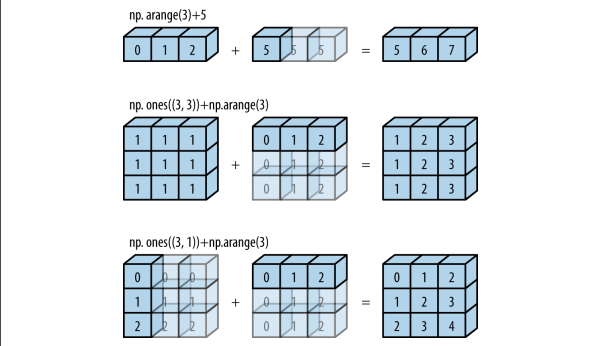

In [58]:
x = torch.arange(12, dtype=torch.float32).reshape((3,4))
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
print(x,y)
x>y

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]]) tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])


tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [60]:
# 当对两个形状不同的NDArray按元素运算时，可能会触发广播（broadcasting）机制：
# 先适当复制元素使这两个NDArray形状相同后再按元素运算。
a = torch.arange(3).reshape((3,1,1))
print(a)
b = torch.arange(2).reshape((1,1,2))
print(b)
c=a+b
print(c)

tensor([[[0]],

        [[1]],

        [[2]]])
tensor([[[0, 1]]])
tensor([[[0, 1]],

        [[1, 2]],

        [[2, 3]]])
